In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

In [2]:
#Physics parameters
g = 9.81
L = 1    # Gamma/m  Gamma is the viscosity and m the mass 

In [3]:
h = 0.01
t = np.arange(0,3+h,h)
#t

In [4]:
def System(r,t):
    
    o, w = r
    
    dodt = w
    dwdt = ((2*g/L - w**2*np.cos(o))*np.sin(o))/((1/3) + (np.sin(o))**2)
    
    return [dodt, dwdt]

In [8]:
def Integrator2(f,r0,t):
    
    h = t[1] - t[0]
    print(h)
    
    o = np.zeros_like(t)
    w = np.zeros_like(t)
    
    o[0] = r0[0]
    w[0] = r0[1]
    
    K1 = np.zeros(2)
    K2 = np.zeros(2)
    
    # Las pendientes instantaneas
    R = np.zeros(2)

    for i in range(1,len(t)):
        
        R = np.array([o[i-1],w[i-1]])
        
        K1 = f(R,t[i-1])
        
        R = np.array([o[i-1]+h*K1[0],w[i-1]+h*K1[1]])
        
        K2 = f(R,t[i-1]+h)
        
        o[i] = o[i-1] + 0.5*h*(K1[0]+K2[0])
        w[i] = w[i-1] + 0.5*h*(K1[1]+K2[1])
        
        
    return o,w

In [9]:

r0 = [10*np.pi/180, 0]

In [10]:
o, w = Integrator2(System,r0,t)

0.01


In [11]:
r = integrate.odeint(System,r0,t)

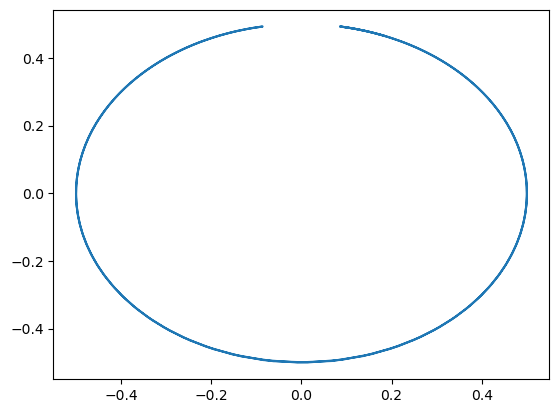

In [14]:
plt.plot(L/2*np.sin(o), L/2*np.cos(o))
#plt.plot(r[:,0],r[:,1])

In [19]:
ang = 0
i = 0
while ang <= np.pi/2:
    ang = o[i]
    i +=1
    
    
print('Tiempo = '+ str(i*h))
    
    

Tiempo = 0.53


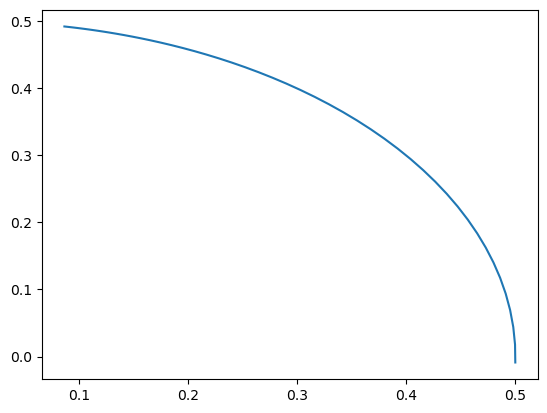

In [17]:

o_ = o[0:i]

plt.plot(L/2*np.sin(o_), L/2*np.cos(o_))